In [5]:
import keras
import keras.backend as K
from keras import layers, models, optimizers
import tensorflow as tf

In [6]:
def unet(input_size = (128,128,1), verbose = False):
    #size filter input
    size_filter_in = 16
    #normal initialization of weights
    kernel_init = 'he_normal'
    #To apply leaky relu after the conv layer 
    activation_layer = None
    inputs = layers.Input(input_size)
    conv1 = layers.Conv2D(size_filter_in, 
                          3, 
                          activation = activation_layer, 
                          padding = 'same', 
                          kernel_initializer = kernel_init)(inputs)
    conv1 = layers.LeakyReLU()(conv1)
    conv1 = layers.Conv2D(size_filter_in, 
                          3, 
                          activation = activation_layer, 
                          padding = 'same',
                          kernel_initializer = kernel_init)(conv1)
    conv1 = layers.LeakyReLU()(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = layers.Conv2D(size_filter_in * 2, 
                          3, 
                          activation = activation_layer,
                          padding = 'same', 
                          kernel_initializer = kernel_init)(pool1)
    conv2 = layers.LeakyReLU()(conv2)
    conv2 = layers.Conv2D(size_filter_in * 2, 
                          3, 
                          activation = activation_layer, 
                          padding = 'same',
                          kernel_initializer = kernel_init)(conv2)
    conv2 = layers.LeakyReLU()(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = layers.Conv2D(size_filter_in * 4, 
                          3, 
                          activation = activation_layer,
                          padding = 'same',
                          kernel_initializer = kernel_init)(pool2)
    conv3 = layers.LeakyReLU()(conv3)
    conv3 = layers.Conv2D(size_filter_in * 4, 
                          3,
                          activation = activation_layer, 
                          padding = 'same', 
                          kernel_initializer = kernel_init)(conv3)
    conv3 = layers.LeakyReLU()(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(size_filter_in * 8, 
                          3, 
                          activation = activation_layer,
                          padding = 'same', 
                          kernel_initializer = kernel_init)(pool3)
    conv4 = layers.LeakyReLU()(conv4)
    conv4 = layers.Conv2D(size_filter_in * 8,
                          3,
                          activation = activation_layer,
                          padding = 'same',
                          kernel_initializer = kernel_init)(conv4)
    conv4 = layers.LeakyReLU()(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = layers.Conv2D(size_filter_in * 16,
                          3, activation = activation_layer,
                          padding = 'same',
                          kernel_initializer = kernel_init)(pool4)
    conv5 = layers.LeakyReLU()(conv5)
    conv5 = layers.Conv2D(size_filter_in * 16, 
                          3,
                          activation = activation_layer,
                          padding = 'same',
                          kernel_initializer = kernel_init)(conv5)
    conv5 = layers.LeakyReLU()(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    up6 = layers.Conv2D(size_filter_in * 8,
                        2,
                        activation = activation_layer,
                        padding = 'same',
                        kernel_initializer = kernel_init)(layers.UpSampling2D(size = (2,2))(drop5))
    up6 = layers.LeakyReLU()(up6)

    merge6 = layers.Concatenate(axis = 3)([drop4, up6])
    conv6 = layers.Conv2D(size_filter_in * 8,
                          3,
                          activation = activation_layer, 
                          padding = 'same',
                          kernel_initializer = kernel_init)(merge6)
    conv6 = layers.LeakyReLU()(conv6)
    conv6 = layers.Conv2D(size_filter_in * 8, 
                          3, 
                          activation = activation_layer,
                          padding = 'same', 
                          kernel_initializer = kernel_init)(conv6)
    conv6 = layers.LeakyReLU()(conv6)
    up7 = layers.Conv2D(size_filter_in * 4,
                        2,
                        activation = activation_layer,
                        padding = 'same',
                        kernel_initializer = kernel_init)(layers.UpSampling2D(size = (2,2))(conv6))
    up7 = layers.LeakyReLU()(up7)

    merge7 = layers.Concatenate(axis = 3)([conv3, up7])
    conv7 = layers.Conv2D(size_filter_in * 4, 
                          3, 
                          activation = activation_layer, 
                          padding = 'same', 
                          kernel_initializer = kernel_init)(merge7)
    conv7 = layers.LeakyReLU()(conv7)
    conv7 = layers.Conv2D(size_filter_in * 4, 
                          3,
                          activation = activation_layer,
                          padding = 'same',
                          kernel_initializer = kernel_init)(conv7)
    conv7 = layers.LeakyReLU()(conv7)
    up8 = layers.Conv2D(size_filter_in * 2,
                        2,
                        activation = activation_layer, 
                        padding = 'same',
                        kernel_initializer = kernel_init)(layers.UpSampling2D(size = (2,2))(conv7))
    up8 = layers.LeakyReLU()(up8)

    merge8 = layers.Concatenate(axis = 3)([conv2, up8])
    conv8 = layers.Conv2D(size_filter_in * 2,
                          3,
                          activation = activation_layer,
                          padding = 'same',
                          kernel_initializer = kernel_init)(merge8)
    conv8 = layers.LeakyReLU()(conv8)
    conv8 = layers.Conv2D(size_filter_in * 2,
                          3,
                          activation = activation_layer, 
                          padding = 'same',
                          kernel_initializer = kernel_init)(conv8)
    conv8 = layers.LeakyReLU()(conv8)

    up9 = layers.Conv2D(size_filter_in,
                        2,
                        activation = activation_layer,
                        padding = 'same',
                        kernel_initializer = kernel_init)(layers.UpSampling2D(size = (2,2))(conv8))
    up9 = layers.LeakyReLU()(up9)

    merge9 = layers.Concatenate(axis = 3)([conv1, up9])
    conv9 = layers.Conv2D(size_filter_in,
                          3, 
                          activation = activation_layer,
                          padding = 'same',
                          kernel_initializer = kernel_init)(merge9)
    conv9 = layers.LeakyReLU()(conv9)
    conv9 = layers.Conv2D(size_filter_in,
                          3,
                          activation = activation_layer, 
                          padding = 'same',
                          kernel_initializer = kernel_init)(conv9)
    conv9 = layers.LeakyReLU()(conv9)
    conv9 = layers.Conv2D(2, 
                          3,
                          activation = activation_layer,
                          padding = 'same',
                          kernel_initializer = kernel_init)(conv9)
    conv9 = layers.LeakyReLU()(conv9)
    conv10 = layers.Conv2D(1, 1, activation = 'tanh')(conv9)

    model = models.Model(inputs,conv10)

    if verbose:
        model.summary()
    return model

model = unet(verbose = False)

In [7]:
import os
import numpy as np
import librosa
import random
from keras.utils.data_utils import Sequence

import glob

In [55]:
n_fft = 255
hop_length_fft = 64
dim_square_spec = int(n_fft / 2) + 1

In [56]:
class data_generator(Sequence):
    def __init__(self,
                clean_audio_path,
                noise_audio_path,
                batch_size = 5,
                file_size = 100,
                wave_size = 8192):
        self.clean_audio_path = clean_audio_path
        self.noise_audio_path = noise_audio_path
        self.batch_size = batch_size
        self.file_size = file_size
        self.wave_size = wave_size
        
        self.n_fft = 255
        self.hop_length = 64
        self.dim_square_spec = int(self.n_fft / 2) + 1
        
        self.clean_file_list = self._load_audio_list(self.clean_audio_path)
        self.noise_file_list = self._load_audio_list(self.noise_audio_path)
        
        if isinstance(self.file_size, int):
            self.clean_file_list = self.clean_file_list[:self.file_size]
            self.noise_file_list = self.noise_file_list[:self.file_size]
        elif isinstance(self.file_size, float):
            n = int(self.file_size * len(self.clean_file_list))
            self.clean_file_list = self.clean_file_list[:n]
            self.noise_file_list = self.noise_file_list[:n]
        
    def _load_audio_list(self, path):
        assert os.path.exists(path), f"{path} not exists."
        return [os.path.join(path, file) for file in os.listdir(path) if file != ".DS_Store"]
    
    def __len__(self):
        return len(self.clean_file_list) // self.batch_size
    
    def __getitem__(self, index):
        if self.batch_size == 1:
            x, y = self._batch_1(index)
            return np.expand_dims(x, 0), np.expand_dims(y, 0)
        else:
            beg = index * self.batch_size
            end = (index + 1) * self.batch_size
            return self._batch_n(beg, end)
    
    def _batch_1(self, index):
        x, y = self._get_audio_wave(index)
        
#         y = x - y
        x_magnitude, x_phase = self._wave_to_magnitude_db_and_phase(x, n_fft = self.n_fft, hop_length = self.hop_length)
        y_magnitude, y_phase = self._wave_to_magnitude_db_and_phase(y, n_fft = self.n_fft, hop_length = self.hop_length)
        
        y_magnitude = x_magnitude - y_magnitude
        x_magnitude = self._normalize(x_magnitude)
        y_magnitude = self._normalize(y_magnitude)
        return np.expand_dims(x_magnitude, -1), np.expand_dims(y_magnitude, -1)
    
    def _batch_n(self, beg, end):
        X = []
        Y = []
        for i in range(beg, end):
            x, y = self._batch_1(i)
            X.append(x)
            Y.append(y)
        return np.array(X), np.array(Y)
    
    def _load_audio(self, path):
        wave, sr = librosa.load(path, mono = True, sr = None)
        return wave
    
    def _get_audio_wave(self, index):
        clean_file = self.clean_file_list[index]
        noise_file = os.path.join(self.noise_audio_path, clean_file.rsplit("/", 1)[1])
        clean_wave = self._load_audio(clean_file)
        noise_wave = self._load_audio(noise_file)
        start_location = np.random.randint(len(clean_wave) - self.wave_size)
        return noise_wave[start_location: start_location + self.wave_size], \
                clean_wave[start_location: start_location + self.wave_size]
    
    def _wave_to_magnitude_db_and_phase(self, wave, n_fft, hop_length):
        stftaudio = librosa.stft(wave, n_fft=n_fft, hop_length=hop_length)
        stftaudio_magnitude, stftaudio_phase = librosa.magphase(stftaudio)
        stftaudio_magnitude_db = librosa.amplitude_to_db(stftaudio_magnitude, ref=np.max)
        return stftaudio_magnitude_db, stftaudio_phase
        
    def _normalize(self, x):
        min_val = np.min(x)
        max_val = np.max(x)
        x = (x - min_val) / ((max_val - min_val) / 2)
        return x - 1

In [57]:
class data_generator(Sequence):
    def __init__(self,
                clean_audio_path,
                noise_audio_path,
                batch_size = 5,
                file_size = 100,
                wave_size = 8192):
        self.clean_audio_path = clean_audio_path
        self.noise_audio_path = noise_audio_path
        self.batch_size = batch_size
        self.file_size = file_size
        self.wave_size = wave_size
        
        self.sample_rate = 48000
        self.n_fft = 255
        self.hop_length = 64
        self.dim_square_spec = int(self.n_fft / 2) + 1
        
        self.clean_file_list = self._load_audio_list(self.clean_audio_path)
        
        if isinstance(self.file_size, int):
            self.clean_file_list = self.clean_file_list[:self.file_size]
        elif isinstance(self.file_size, float):
            n = int(self.file_size * len(self.clean_file_list))
            self.clean_file_list = self.clean_file_list[:n]
        
    def _load_audio_list(self, path):
        return [file for file in glob.glob(path, recursive = True)]
    
    def __len__(self):
        return len(self.clean_file_list) // self.batch_size
    
    def __getitem__(self, index):
        if self.batch_size == 1:
            x, y = self._batch_1(index)
            return np.expand_dims(x, 0), np.expand_dims(y, 0)
        else:
            beg = index * self.batch_size
            end = (index + 1) * self.batch_size
            return self._batch_n(beg, end)
    
    def _batch_1(self, index):
        clean, noise, noisy_clean = self._get_audio_wave(index)
    
        y = clean
        x = noisy_clean
        
        
        x_magnitude, x_phase = self._wave_to_magnitude_db_and_phase(x, n_fft = self.n_fft, hop_length = self.hop_length)
        y_magnitude, y_phase = self._wave_to_magnitude_db_and_phase(y, n_fft = self.n_fft, hop_length = self.hop_length)
        
        y_magnitude = x_magnitude - y_magnitude
#         x_magnitude = self._normalize(x_magnitude)
#         y_magnitude = self._normalize(y_magnitude)
        x_magnitude = self.scaled_in(x_magnitude)
        y_magnitude = self.scaled_ou(y_magnitude)
        return np.expand_dims(x_magnitude, -1), np.expand_dims(y_magnitude, -1)
    
    def _batch_n(self, beg, end):
        X = []
        Y = []
        for i in range(beg, end):
            x, y = self._batch_1(i)
            X.append(x)
            Y.append(y)
        return np.array(X), np.array(Y)
    
    def _load_audio(self, path):
        wave, sr = librosa.load(path, mono = True, sr = self.sample_rate)
        return wave
    
    def _get_audio_wave(self, index):
        clean_file = self.clean_file_list[index]
        
        while True:
            try:
                random_folder = np.random.randint(1,10)

                noise_file = np.random.choice(os.listdir(os.path.join(self.noise_audio_path, f"fold{random_folder}")))
                noise_file = os.path.join(self.noise_audio_path, f"fold{random_folder}", noise_file)

                clean_wave = self._load_audio(clean_file)
                noise_wave = self._load_audio(noise_file)
                start_location = np.random.randint(len(clean_wave) - self.wave_size)

                noise_wave = noise_wave[start_location: start_location + self.wave_size]
                clean_wave = clean_wave[start_location: start_location + self.wave_size]
                return self._blend_noise_randomly(noise_wave, clean_wave)
            except: pass
        
    def _blend_noise_randomly(self, noise, clean):
        level_noise = np.random.uniform(0.2, 0.8)
        noisy_clean = clean + level_noise * noise
        return clean, noise, noisy_clean
    
    def _wave_to_magnitude_db_and_phase(self, wave, n_fft, hop_length):
        stftaudio = librosa.stft(wave, n_fft = n_fft, hop_length = hop_length)
        stftaudio_magnitude, stftaudio_phase = librosa.magphase(stftaudio)
        stftaudio_magnitude_db = librosa.amplitude_to_db(stftaudio_magnitude, ref = np.max)
        return stftaudio_magnitude_db, stftaudio_phase
        
    def _normalize(self, x):
        min_val = np.min(x)
        max_val = np.max(x)
        x = (x - min_val) / ((max_val - min_val) / 2)
        return x - 1
    
    def scaled_in(self, matrix_spec):
        matrix_spec = (matrix_spec + 46) / 50
        return matrix_spec

    def scaled_ou(self, matrix_spec):
        matrix_spec = (matrix_spec - 6) / 82
        return matrix_spec

In [70]:
# clean_audio_path = "/Volumes/IPEVO_X0244/speech_to_text/speech_to_text_dataset/clean_trainset_56spk_wav/"
# noise_audio_path = "/Volumes/IPEVO_X0244/speech_to_text/speech_to_text_dataset/noisy_trainset_56spk_wav/"

clean_audio_path = "/Volumes/IPEVO_X0244/speech_to_text/speech_to_text_dataset/LibriSpeech/dev-clean/**/*.wav"
noise_audio_path = "/Volumes/IPEVO_X0244/speech_to_text/speech_to_text_dataset/UrbanSound8K/audio/"

g = data_generator(clean_audio_path = clean_audio_path, noise_audio_path= noise_audio_path, file_size= 50)

d = g.__getitem__(0)
print(d[0].shape)
print(d[1].shape)

(5, 128, 128, 1)
(5, 128, 128, 1)


In [ ]:
# model = unet(verbose = False)
model.compile(optimizer = keras.optimizers.adam(learning_rate = 1e-3),
              loss = keras.losses.huber_loss, metrics= ['mae'])
model.fit_generator(g, 
                    epochs = 50,
                    shuffle = False)


Epoch 1/50
10/10 [==============================] - 72s 7s/step - loss: 0.0349 - mae: 0.1751
Epoch 2/50
10/10 [==============================] - 80s 8s/step - loss: 0.0180 - mae: 0.1352
Epoch 3/50
10/10 [==============================] - 72s 7s/step - loss: 0.0130 - mae: 0.1203
Epoch 4/50
10/10 [==============================] - 69s 7s/step - loss: 0.0110 - mae: 0.1034
Epoch 5/50
10/10 [==============================] - 87s 9s/step - loss: 0.0118 - mae: 0.1078
Epoch 6/50
10/10 [==============================] - 101s 10s/step - loss: 0.0074 - mae: 0.0809
Epoch 7/50
10/10 [==============================] - 63s 6s/step - loss: 0.0080 - mae: 0.0829
Epoch 8/50
10/10 [==============================] - 74s 7s/step - loss: 0.0073 - mae: 0.0828
Epoch 9/50
10/10 [==============================] - 69s 7s/step - loss: 0.0082 - mae: 0.0877
Epoch 10/50
10/10 [==============================] - 70s 7s/step - loss: 0.0058 - mae: 0.0720
Epoch 11/50
10/10 [==============================] - 77s 8s/step - 

# test

In [49]:
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
from numpy import fft
import scipy
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from tqdm import tqdm

wave : (120240,), sr: 48000


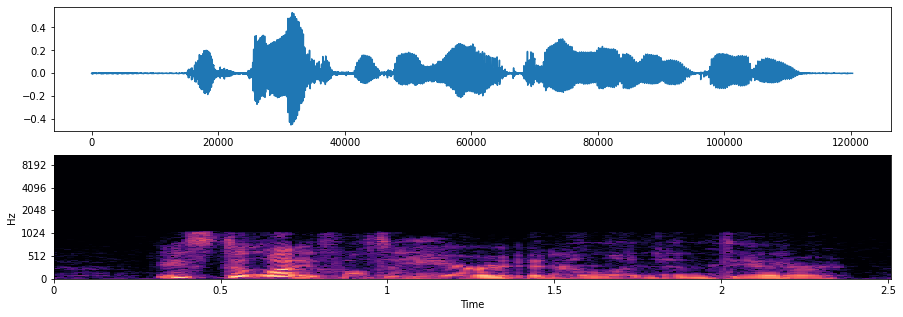

In [9]:
clean_audio_path = "/Volumes/IPEVO_X0244/speech_to_text/speech_to_text_dataset/LibriSpeech/dev-clean/**/*.wav"
clean_path = np.random.choice([file for file in glob.glob(clean_audio_path, recursive = True)])
wave, sr = librosa.load(clean_path, mono= True, sr= 48000)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(2,1,1)
plt.plot(wave)
print(f"wave : {wave.shape}, sr: {sr}")

ax = fig.add_subplot(2,1,2)
clean_d = librosa.amplitude_to_db(np.abs(librosa.stft(wave)), ref = np.max)
librosa.display.specshow(clean_d, sr=sr, x_axis='time', y_axis='mel')
ipd.Audio(clean_path)

noise wave : (192001,), sr: 48000


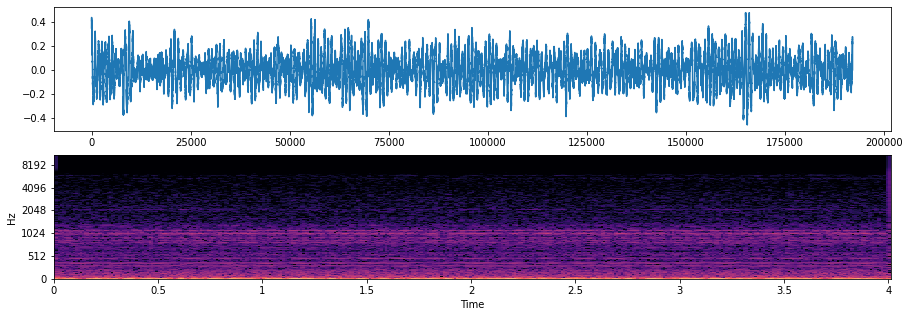

In [10]:
noise_audio_path = "/Volumes/IPEVO_X0244/speech_to_text/speech_to_text_dataset/UrbanSound8K/audio/**/*.wav"

noise_path = np.random.choice([file for file in glob.glob(noise_audio_path, recursive= True)])

noise_wave, noise_sr = librosa.load(noise_path, mono= True, sr= 48000)
print(f"noise wave : {noise_wave.shape}, sr: {noise_sr}")
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(2,1,1)
plt.plot(noise_wave)


ax = fig.add_subplot(2,1,2)
noise_d = librosa.amplitude_to_db(np.abs(librosa.stft(noise_wave)), ref = np.max)
librosa.display.specshow(noise_d, sr=noise_sr, x_axis='time', y_axis='mel')
ipd.Audio(noise_path)

In [11]:
sample_rate = 48000
frame_length = 8192
hop_length_frame = 8192 
n_fft = 255
hop_length = 64
dim_square_spec = int(n_fft / 2) + 1

In [12]:
def audio_to_audio_frame_stack(sound_data, frame_length, hop_length_frame):
    sequence_sample_length = sound_data.shape[0]
    sound_data = np.concatenate([sound_data, np.zeros(((sequence_sample_length // frame_length) + 1) * frame_length - sequence_sample_length)])
    sequence_sample_length = sound_data.shape[0]
    
    sound_data_list = [sound_data[start : start + frame_length] for start in range(
    0, sequence_sample_length - frame_length + 1, hop_length_frame)]  # get sliding windowss
    sound_data_array = np.vstack(sound_data_list)
    return sound_data_array

voice = audio_to_audio_frame_stack(wave, frame_length, hop_length_frame)
print(f"voice shape: {voice.shape}")
noise = audio_to_audio_frame_stack(noise_wave, frame_length, hop_length)
print(f"noise shape: {noise.shape}")

voice shape: (15, 8192)
noise shape: (2945, 8192)


In [13]:
def blend_noise_randomly(voice, noise, nb_samples, frame_length):
    prod_voice = np.zeros((nb_samples, frame_length))
    prod_noise = np.zeros((nb_samples, frame_length))
    prod_noisy_voice = np.zeros((nb_samples, frame_length))
    
    for i in range(nb_samples):
        id_noise = np.random.randint(0, noise.shape[0])
        level_noise = np.random.uniform(0.2, 0.8)
        prod_voice[i, :] = voice[i, :]
        prod_noise[i, :] = level_noise * noise[i, :]
        prod_noisy_voice[i, :] = voice[i, :] + prod_noise[i, :]
    return prod_voice, prod_noise, prod_noisy_voice

prod_voice, prod_noise, prod_noisy_voice = blend_noise_randomly(voice, noise, voice.shape[0], frame_length)    
print(f"prod voice shape: {prod_voice.shape}")
print(f"prod noise shape: {prod_noise.shape}")
print(f"prod noisy voice shape: {prod_noisy_voice.shape}")

prod voice shape: (15, 8192)
prod noise shape: (15, 8192)
prod noisy voice shape: (15, 8192)


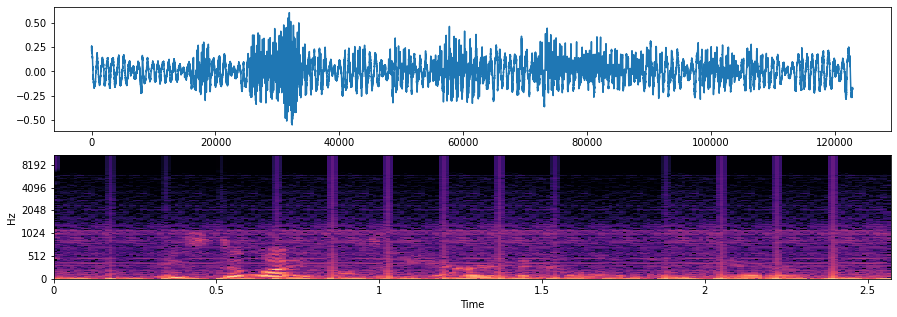

In [14]:
test = prod_noisy_voice
test = test.reshape(1, -1)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(2,1,1)
plt.plot(test[0])

ax = fig.add_subplot(2,1,2)
noise_d = librosa.amplitude_to_db(np.abs(librosa.stft(test[0])), ref = np.max)
librosa.display.specshow(noise_d, sr=48000, x_axis='time', y_axis='mel')
ipd.Audio(test[0], rate=48000)

In [15]:
def audio_to_magnitude_db_and_phase(n_fft, hop_length_fft, audio):
    stftaudio = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length_fft)
    stftaudio_magnitude, stftaudio_phase = librosa.magphase(stftaudio)
    stftaudio_magnitude_db = librosa.amplitude_to_db(stftaudio_magnitude, ref=np.max)
    return stftaudio_magnitude_db, stftaudio_phase

def numpy_audio_to_matrix_spectrogram(numpy_audio, dim_square_spec, n_fft, hop_length_fft):
    nb_audio = numpy_audio.shape[0]
    m_mag_db = np.zeros((nb_audio, dim_square_spec, dim_square_spec))
    m_phase = np.zeros((nb_audio, dim_square_spec, dim_square_spec), dtype=complex)
    for i in range(nb_audio):
        m_mag_db[i, :, :], m_phase[i, :, :] = audio_to_magnitude_db_and_phase(
            n_fft, hop_length_fft, numpy_audio[i])
    return m_mag_db, m_phase

In [16]:
m_amp_db_voice,  m_pha_voice = numpy_audio_to_matrix_spectrogram(
        prod_voice, dim_square_spec, n_fft, hop_length)
print(f"m_amp_db_voice : {m_amp_db_voice.shape}")
print(f"m_pha_voice: {m_pha_voice.shape}")

m_amp_db_noise,  m_pha_noise = numpy_audio_to_matrix_spectrogram(
        prod_noise, dim_square_spec, n_fft, hop_length)
print(f"m_amp_db_noise : {m_amp_db_noise.shape}")
print(f"m_pha_noise: {m_pha_noise.shape}")

m_amp_db_noisy_voice,  m_pha_noisy_voice = numpy_audio_to_matrix_spectrogram(
        prod_noisy_voice, dim_square_spec, n_fft, hop_length)
print(f"m_amp_db_noisy_voice : {m_amp_db_noisy_voice.shape}")
print(f"m_pha_noisy_voice: {m_pha_noisy_voice.shape}")

m_amp_db_voice : (15, 128, 128)
m_pha_voice: (15, 128, 128)
m_amp_db_noise : (15, 128, 128)
m_pha_noise: (15, 128, 128)
m_amp_db_noisy_voice : (15, 128, 128)
m_pha_noisy_voice: (15, 128, 128)


In [17]:
def scaled_in(matrix_spec):
    "global scaling apply to noisy voice spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec + 46)/50
    return matrix_spec

In [63]:
X_in = scaled_in(m_amp_db_noisy_voice)
X_in = np.expand_dims(X_in, -1)
X_pred = model.predict(X_in)

In [64]:
def inv_scaled_ou(matrix_spec):
    "inverse global scaling apply to noise models spectrograms"
    matrix_spec = matrix_spec * 82 + 6
    return matrix_spec
inv_sca_X_pred = inv_scaled_ou(X_pred)
X_denoise = m_amp_db_noisy_voice - inv_sca_X_pred[:,:,:,0]

In [65]:
def magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, stftaudio_magnitude_db, stftaudio_phase):
    stftaudio_magnitude_rev = librosa.db_to_amplitude(stftaudio_magnitude_db, ref=1.0)
    audio_reverse_stft = stftaudio_magnitude_rev * stftaudio_phase
    audio_reconstruct = librosa.core.istft(audio_reverse_stft, hop_length=hop_length_fft, length=frame_length)
    return audio_reconstruct

def matrix_spectrogram_to_numpy_audio(m_mag_db, m_phase, frame_length, hop_length_fft)  :
    list_audio = []
    nb_spec = m_mag_db.shape[0]
    for i in range(nb_spec):
        audio_reconstruct = magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, m_mag_db[i], m_phase[i])
        list_audio.append(audio_reconstruct)
    return np.vstack(list_audio)

audio_denoise_recons = matrix_spectrogram_to_numpy_audio(X_denoise, m_pha_noisy_voice, frame_length, hop_length)

In [66]:
denoise_long = audio_denoise_recons.reshape(1, -1) * 10
print(f"denoise_long shape: {denoise_long.shape}")

denoise_long shape: (1, 122880)


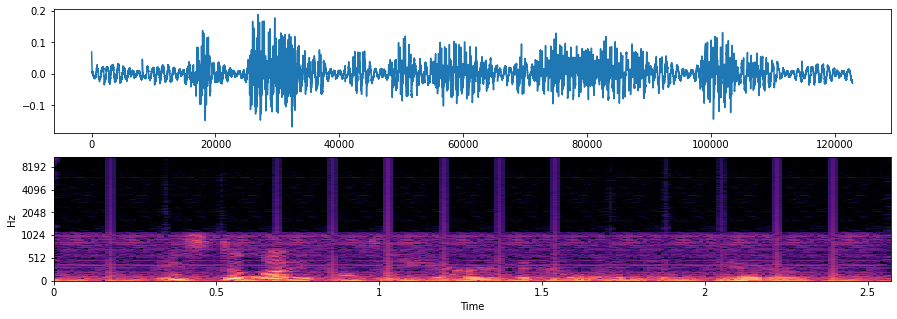

In [67]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(2,1,1)
plt.plot(denoise_long[0])

ax = fig.add_subplot(2,1,2)
noise_d = librosa.amplitude_to_db(np.abs(librosa.stft(denoise_long[0])), ref = np.max)
librosa.display.specshow(noise_d, sr=48000, x_axis='time', y_axis='mel')
ipd.Audio(denoise_long[0], rate=48000)

In [68]:
stats.describe((m_amp_db_noisy_voice-m_amp_db_voice).reshape(-1,1))

DescribeResult(nobs=245760, minmax=(array([-63.99657838]), array([80.])), mean=array([7.06653343]), variance=array([112.50979009]), skewness=array([0.027021]), kurtosis=array([1.16455353]))

In [69]:
def scaled_in(matrix_spec):
    "global scaling apply to noisy voice spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec + 46)/50
    return matrix_spec

def scaled_ou(matrix_spec):
    "global scaling apply to noise models spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec -6 )/82
    return matrix_spec

In [25]:
X_in = m_amp_db_noisy_voice
X_ou = m_amp_db_voice
X_ou = X_in - X_ou
X_in = scaled_in(X_in)
X_ou = scaled_ou(X_ou)
X_in = np.expand_dims(X_in, -1)
X_ou = np.expand_dims(X_ou, -1)
print(X_in.shape)
print(X_ou.shape)

(15, 128, 128, 1)
(15, 128, 128, 1)
